In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


In [116]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
PATH='drive/MyDrive/enpm808w-datasets/housing_prices/'

Mounted at /content/drive/


In [117]:
train_df =pd.read_csv(PATH + 'house_train.csv')
test_df=pd.read_csv(PATH + 'house_test.csv')
train_df.head()

,id,zip,state,county,poverty,price2007,price2013
0,0,10467,NY,bronx,27.1,335200,294000
1,1,11226,NY,kings,21.9,471500,471600
2,2,60640,IL,cook,14.6,254600,174200
3,3,94109,CA,san francisco,10.6,707100,822600
4,4,11375,NY,queens,12.2,636400,681500


In [118]:
# train_df['state'].unique()
# sns.pairplot(train_df)

In [119]:
test_df.head()

,id,zip,state,county,poverty,price2007
0,6,32162,FL,marion,13.0,265600
1,13,78572,TX,hidalgo,34.0,79900
2,20,11212,NY,kings,21.9,332000
3,30,37042,TN,montgomery,12.7,98700
4,37,85032,AZ,maricopa,12.9,266100


In [120]:
train_df.shape

# train_df.shape

(8973, 7)

In [121]:
test_df.shape

(1063, 6)

In [122]:
for tt in [train_df, test_df]:
  (tt.info())
# train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         8973 non-null   int64  
 1   zip        8973 non-null   int64  
 2   state      8973 non-null   object 
 3   county     8973 non-null   object 
 4   poverty    8973 non-null   float64
 5   price2007  8973 non-null   int64  
 6   price2013  8973 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 490.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1063 non-null   int64  
 1   zip        1063 non-null   int64  
 2   state      1063 non-null   object 
 3   county     1063 non-null   object 
 4   poverty    1063 non-null   float64
 5   price2007  1063 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memo

no null values present

getting all statistical data

In [123]:
train_df.describe() 

,id,zip,poverty,price2007,price2013
count,8973.000000,8973.000000,8973.000000,8.973000e+03,8.973000e+03
mean,5016.424830,45752.551098,11.438504,2.880939e+05,2.424867e+05
std,2900.023449,31306.650907,4.520784,2.276980e+05,2.176485e+05
min,0.000000,1001.000000,-1.000000,3.400000e+04,3.520000e+04
25%,2505.000000,19026.000000,8.400000,1.397000e+05,1.223000e+05
50%,5023.000000,37324.000000,11.100000,2.230000e+05,1.788000e+05
75%,7528.000000,76085.000000,14.500000,3.627000e+05,2.848000e+05
max,10035.000000,99709.000000,34.000000,3.467800e+06,4.709500e+06


In [124]:
test_df.describe()

,id,zip,poverty,price2007
count,1063.000000,1063.000000,1063.000000,1.063000e+03
mean,5026.575729,45231.877705,11.204798,2.907117e+05
std,2875.433022,31880.881738,4.388406,2.308495e+05
min,6.000000,1002.000000,-1.000000,4.020000e+04
25%,2544.500000,18097.000000,8.300000,1.426500e+05
50%,4953.000000,36582.000000,11.000000,2.302000e+05
75%,7516.500000,75907.000000,14.200000,3.675000e+05
max,10029.000000,99712.000000,34.000000,2.569700e+06


**Task 2:**
To divide data into independent variable and dependent variable since we are using only state information only: state information would include the zip code only for each state since the state column is a string
  x = zip, y = price2013

In [125]:
x = train_df.drop(['id','zip','county','poverty','price2007','price2013'],axis=1)
x=pd.get_dummies(data=x, drop_first=True)

y = train_df['price2013']


In [126]:
print(x.shape)
print(y.shape)
x

(8973, 45)
(8973,)


,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_RI,state_SC,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI,state_WV,state_WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8969,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
# x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80, test_size=0.2, random_state=100)
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# sns.scatterplot(x='state', y='price2013')


(7178, 45)
(1795, 45)
(7178,)
(1795,)


In [128]:
state_lr=LinearRegression(fit_intercept=True)
state_info_lr = state_lr.fit(x_train,y_train) 


**Task 2A**
What is the intercept? What does it correspond to? 


In [129]:
# lr.intercept_
print('the Intercept is', state_lr.intercept_)

the Intercept is 275912.4999999983


The intercept corresponds to the overall mean value in relation to the state values being equal to zero

In [130]:
# lr.coef_
print('the state coefficients are \n', state_lr.coef_)


the state coefficients are 
 [-141473.06338028 -151565.13157895  -65791.34615384  236045.87765958
  -31267.93478261   17090.39017341  217594.64285714  -60235.22727273
 -107577.5092081  -132817.09770115  200770.83333333 -126971.23015873
 -100065.1119403  -141122.5        -138595.83333333 -122910.
 -140168.05555555   62850.16666667     642.85714286 -131972.23451327
  -72952.5        -120364.31818182  -58572.5        -124676.5625
  -88712.5        -137127.5         -72609.9025974    33627.55934718
  -88093.45238095  -51110.11904762   16591.14298725 -159716.31231671
 -164537.24226804  -58785.1618705  -106841.51785714  -56870.27777778
 -124189.56422018 -145529.25126903 -122894.77848101  -39524.56896552
   33601.87125749   -7174.25115207 -110787.97169811 -177530.68181818
  -81432.5       ]


**Task 2B**
How do you get this information from your regression?

Using the Formula for Linear Regression
**Y=B0+B1X1**

where Y is the prediction/dependent variable 
B0 is the y-intercept, 
B1 is the coefficient/slope
X1 is the independent variable

In [131]:
coeff_df = pd.DataFrame(state_lr.coef_,x_train.columns,columns=['Coefficients'])
coeff_df['states']=x_train.columns.str.replace('state_','')
coeff_df


,Coefficients,states
state_AL,-141473.063380,AL
state_AR,-151565.131579,AR
state_AZ,-65791.346154,AZ
state_CA,236045.877660,CA
state_CO,-31267.934783,CO
state_CT,17090.390173,CT
state_DC,217594.642857,DC
state_DE,-60235.227273,DE
state_FL,-107577.509208,FL
state_GA,-132817.097701,GA


**Task 2C**
Based on your regression coefficients, what states have the most and least 
expensive average homes?

In [132]:
# coeff_df.sort_values(by='Coefficients',ascending=False)
print('the state that have the most expensive average homes', coeff_df.max())
print('the state that have the least expensive average homes', coeff_df.min())


the state that have the most expensive average homes Coefficients    236045.87766
states                    WY
dtype: object
the state that have the least expensive average homes Coefficients   -177530.681818
states                     AL
dtype: object


In [133]:
coeff_df.value_counts()

Coefficients    states
-177530.681818  WV        1
-88093.452381   NM        1
-72952.500000   MN        1
-72609.902597   NH        1
-65791.346154   AZ        1
-60235.227273   DE        1
-58785.161871   OR        1
-58572.500000   MT        1
-56870.277778   RI        1
-51110.119048   NV        1
-39524.568966   UT        1
-31267.934783   CO        1
-7174.251152    WA        1
 642.857143     MD        1
 16591.142987   NY        1
 17090.390173   CT        1
 33601.871257   VA        1
 33627.559347   NJ        1
 62850.166667   MA        1
 200770.833333  HI        1
 217594.642857  DC        1
-81432.500000   WY        1
-88712.500000   ND        1
-164537.242268  OK        1
-100065.111940  IL        1
-159716.312317  OH        1
-151565.131579  AR        1
-145529.251269  TN        1
-141473.063380  AL        1
-141122.500000  IN        1
-140168.055556  LA        1
-138595.833333  KS        1
-137127.500000  NE        1
-132817.097701  GA        1
-131972.234513  MI       

In [134]:

# regression_line =[state_lr.coef_*x + state_lr.intercept_ for x in x ]
# regression_line
# # plt.plot(x,regression_line)
# # plt.show()

In [135]:
# train_df.mean()
# plt.figure(figsize=(12,6))
# sns.scatterplot(x='state', y=train_df['price2013'].mean(), data=train_df)
# price_mean= train_df['price2013'].mean()
print(train_df['price2013'].value_counts())


125300    12
118100    12
111500    10
114900    10
132800    10
          ..
516600     1
607500     1
50800      1
460200     1
181700     1
Name: price2013, Length: 3924, dtype: int64


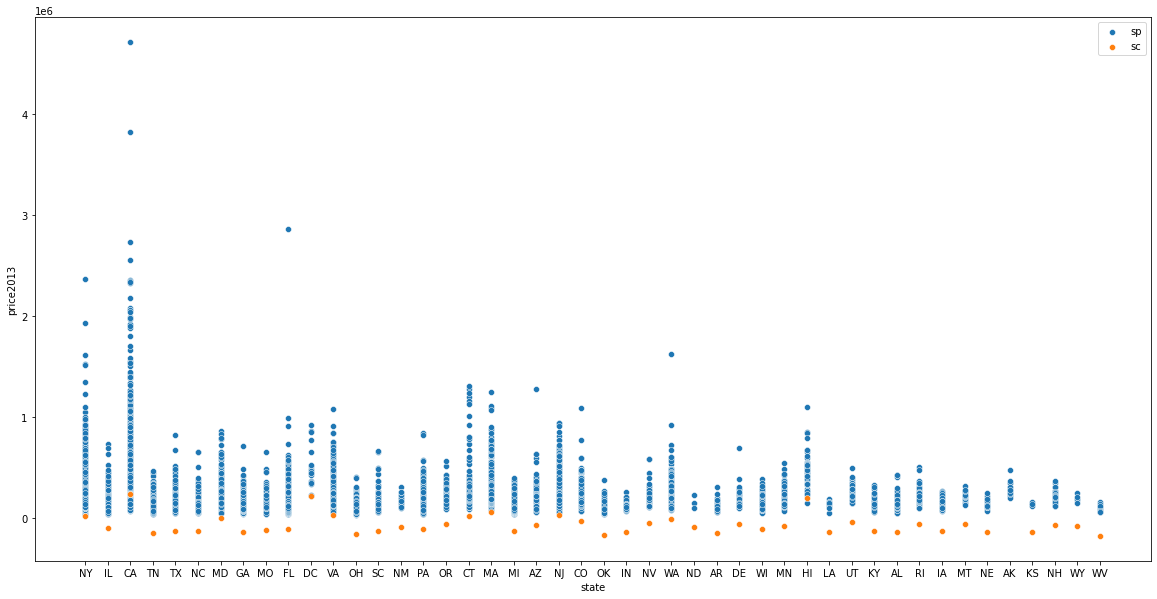

In [136]:
# plt.figure(figsize=(16,10))
# sns.scatterplot(x=train_df['zip'], y=train_df['price2013'])
# sns.barplot(x=x,y='price2013', hue='lr')
# ax=train_df.plot(x='state', y='price2013')
# coeff_df.plot(ax=ax, x='states', y='Coefficients')
# df = pd.concat([train_df,coeff_df]).reset_index(drop=True)
# sns.relplot(data=df, x='price2013',y='Coefficients', hue='states')
fig, ax=plt.subplots(figsize=(20,10))
sns.scatterplot(data=train_df, x='state',y='price2013',label='sp',ax=ax)
sns.scatterplot(data=coeff_df, x='states',y='Coefficients',label='sc',ax=ax)

In [137]:
s_pred_train = state_lr.predict(x_train)
s_pred_train


array([168334.9907919 , 151235.9375    , 511958.37765957, ...,
       236387.93103448, 155548.18181818, 309540.05934718])

In [138]:
s_pred_test = state_lr.predict(x_test)
s_pred_test

array([116196.18768328, 168334.9907919 , 148941.26984127, ...,
       309540.05934718, 111375.25773196, 168334.9907919 ])

In [139]:
state_lr.score(x_train,y_train)


0.2945727409709452

In [140]:
print('RMSE Score is :', rmse(y_test,s_pred_test))

RMSE Score is : 202720.10936315227


In [141]:
df_pred_s=pd.DataFrame(s_pred_train, columns=['State Predictions'])
df_pred_s

,State Predictions
0,168334.990792
1,151235.937500
2,511958.377660
3,215677.272727
4,124347.368421
...,...
7173,276555.357143
7174,168334.990792
7175,236387.931034
7176,155548.181818


**Task 2D**
How do you get this information from your regression?

by checking for the maximum and minimum values of the regression coefficients 

**Task 2E**
 What is the average price of homes in those states?

In [142]:
# avg_price = lr.coef_+lr.intercept_
avg_price_df= pd.DataFrame(state_lr.coef_+state_lr.intercept_,x_train.columns,columns=['Average Price of Homes'])\
.sort_values(by='Average Price of Homes', ascending=False)
avg_price_df

,Average Price of Homes
state_CA,511958.377660
state_DC,493507.142857
state_HI,476683.333333
state_MA,338762.666667
state_NJ,309540.059347
state_VA,309514.371257
state_CT,293002.890173
state_NY,292503.642987
state_MD,276555.357143
state_WA,268738.248848


**Task 2F**
How do you get this information from your regression?

the coefficients and the intercept define the linear relationship between the two variables and can be estimated as an averate rate of change. so the greater the coefficient, the higher the rate of change. As the average price for each state increases, so does the price of each state

**Task 3**
 Predict 2013 home prices from state and county information.
 
**A.** What US counties have the highest and lowest regression coefficients? 
Why?


In [143]:
X = train_df.drop(['id','zip','poverty','price2007','price2013'],axis=1)
X=pd.get_dummies(data=X, drop_first=True)

y = train_df['price2013']

In [144]:
print(X.shape)
print(y.shape)
X

(8973, 672)
(8973,)


,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,county_yadkin,county_yakima,county_yamhill,county_yates,county_yavapai,county_yellowstone,county_yolo,county_york,county_yuba,county_yuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8969,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80, test_size=0.2, random_state=100)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7178, 672)
(1795, 672)
(7178,)
(1795,)


In [146]:
sc_lr=LinearRegression()
state_cty_info_lr=sc_lr.fit(X_train,y_train)

In [147]:
# sc_lr.coef_
print('State and County coefficients are \n', sc_lr.coef_)

State and County coefficients are 
 [ 9.96273421e+16  9.96273421e+16  9.96273421e+16  9.96273421e+16
  9.96273421e+16  9.96273421e+16  8.49926936e+18  9.96273421e+16
  9.96273421e+16  9.96273421e+16  5.74199154e+17  9.96273421e+16
  9.96273421e+16  9.96273421e+16  9.96273421e+16  9.96273421e+16
  3.54686304e+18  9.96273421e+16  9.96273421e+16  9.96273421e+16
  9.96273421e+16  9.96273421e+16 -4.31952824e+18  9.96273421e+16
 -5.91998922e+18  9.96273421e+16  9.96273421e+16  9.96273421e+16
 -3.69875766e+17  9.96273421e+16  9.96273421e+16  9.96273421e+16
  9.96273421e+16  9.96273421e+16  9.96273421e+16  9.96273421e+16
  9.96273421e+16  9.96273421e+16  9.96273421e+16  9.96273421e+16
  9.96273421e+16  9.96273421e+16  9.96273421e+16  9.96273421e+16
  6.99807630e+17 -7.90400000e+03  4.07360000e+04  4.89920000e+04
  1.40168000e+05  3.99040000e+04  1.34528000e+05  3.54008000e+05
  2.97120000e+04 -1.67936000e+05  7.93600000e+03  4.30000000e+04
 -2.56680000e+05  9.96273421e+16 -1.82400000e+03  1.17

In [148]:
county_coeff_df = pd.DataFrame(sc_lr.coef_,X_train.columns,columns=['Coefficients'])
# df=pd.concat([coeff_df,county_coeff_df],axis=1)
# df=coeff_df.append(county_coeff_df)
county_coeff_df['states']=X_train.columns.str.replace('state_','')
county_coeff_df['Counties']=X_train.columns.str.replace('county_','')
# county_coeff_df
county_coeff_df
# df.describe()
# df


,Coefficients,states,Counties
state_AL,9.962734e+16,AL,state_AL
state_AR,9.962734e+16,AR,state_AR
state_AZ,9.962734e+16,AZ,state_AZ
state_CA,9.962734e+16,CA,state_CA
state_CO,9.962734e+16,CO,state_CO
...,...,...,...
county_yellowstone,4.419156e+18,county_yellowstone,yellowstone
county_yolo,-1.224320e+05,county_yolo,yolo
county_york,4.902400e+04,county_york,york
county_yuba,-2.857140e+05,county_yuba,yuba


In [149]:
print('the state that have the most expensive average homes', county_coeff_df.max())
print('the state that have the least expensive average homes', county_coeff_df.min())

the state that have the most expensive average homes Coefficients    13966123729300289536.0
states                     county_yuma
Counties                          yuma
dtype: object
the state that have the least expensive average homes Coefficients   -8399642013684506624.0
states                             AL
Counties                        aiken
dtype: object


In [150]:
sc_pred=sc_lr.predict(X_train)
sc_pred  
sc_pred_df=pd.DataFrame(sc_pred, columns=['State & County Predictions'], )
sc_pred_df

,State & County Predictions
0,186944.0
1,645536.0
2,160160.0
3,309584.0
4,130112.0
...,...
7173,108960.0
7174,167520.0
7175,580256.0
7176,134592.0


In [151]:
sc_lr.score(X_train,y_train)

0.5455253990422053

In [152]:
X_test.isnull().sum()

state_AL              0
state_AR              0
state_AZ              0
state_CA              0
state_CO              0
                     ..
county_yellowstone    0
county_yolo           0
county_york           0
county_yuba           0
county_yuma           0
Length: 672, dtype: int64

In [153]:
sc_pred_test = sc_lr.predict(X_test)
sc_pred_test

array([115728., 128208., 113536., ..., 114880., 138672., 182400.])

In [154]:
print('RMSE Score:')
print(rmse(y_test,sc_pred_test))


RMSE Score:
3.736085105401353e+17


In [155]:
sc_s_pred=pd.concat([df_pred_s,sc_pred_df],axis=1)
sc_s_pred

,State Predictions,State & County Predictions
0,168334.990792,186944.0
1,151235.937500,645536.0
2,511958.377660,160160.0
3,215677.272727,309584.0
4,124347.368421,130112.0
...,...,...
7173,276555.357143,108960.0
7174,168334.990792,167520.0
7175,236387.931034,580256.0
7176,155548.181818,134592.0


In [156]:

from xgboost import XGBRegressor
model= XGBRegressor(n_estimators=350, max_depth=15,learning_rate=.1,random_state=1,\
                    n_jobs=10,subsample=1,min_child_weight=0.6)
model.fit(X_train,y_train)
preds_test=model.predict(X_test)

[00:36:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [157]:
# preds_test
print('RMSE Score:')
print(rmse(y_test,preds_test))

RMSE Score:
138283.42566535552


In [158]:
test_df1 = pd.get_dummies(test_df)
X_train, X_test = X_train.align(test_df1, join='left', axis=1)
test_df1.head()

,id,zip,poverty,price2007,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,...,county_wood,county_worcester,county_wright,county_yadkin,county_yakima,county_yamhill,county_yavapai,county_yellowstone,county_york,county_yuba
0,6,32162,13.0,265600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,78572,34.0,79900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,11212,21.9,332000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,37042,12.7,98700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,85032,12.9,266100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
preds_test=model.predict(X_test)
print(len(preds_test))

1063


Text(0.5, 1.0, 'Predicted House Price')

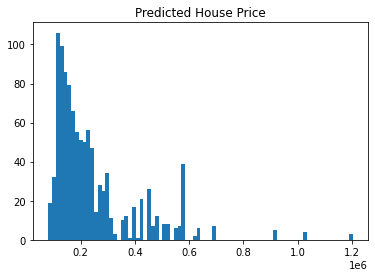

In [160]:
plt.hist(preds_test,bins=80)
plt.title('Predicted House Price')


In [161]:
output = pd.DataFrame({'id':test_df1.id,
                       'HousePrice': preds_test})
output.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
